In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import sys
sys.path.append('./extraction_scripts')

import map_fxn as mf
import matplotlib.pyplot as plt
import numpy as np
import cmocean
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)

import netCDF4 as nc
from operator import itemgetter 

bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])
bathy = '/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc'
tbath = nc.Dataset(bathy)

spacing = 10
stn_x, stn_y = mf.make_stns(spacing)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
no_stns = len(d_stn_x)



In [4]:
dps = []

for i in range(0,len(d_stn_x)):
    dps.append(tbath['Bathymetry'][d_stn_y[i],d_stn_x[i]])

dps = np.array(dps)

In [5]:
JDF_list = [15,19,37,43,72,76,104, 151,193,256]
JDF_col = ['mediumaquamarine','aquamarine', 'turquoise', 'lightseagreen', \
           'mediumturquoise', 'darkturquoise', 'darkslategrey', 'paleturquoise', 'teal',  'cyan']

CS_list = [491,444,516,383,360,519,392,240,559,562]
CS_col = ['navy', 'cornflowerblue', 'lightblue', 'deepskyblue', 'skyblue',\
          'lightskyblue', 'steelblue', 'royalblue', 'dodgerblue', 'blue' ]

HARO_list = [353,323,436,408,481,527,576,356,456,411]
HARO_col = ['firebrick', 'maroon', 'darkred', 'red', 'mistyrose',\
            'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon',]

NS_list = [396,229,247,122,119,97,113,96,338,210]
NS_col = ['olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse',\
          'lawngreen', 'palegreen', 'forestgreen', 'limegreen', 'darkgreen','green',]

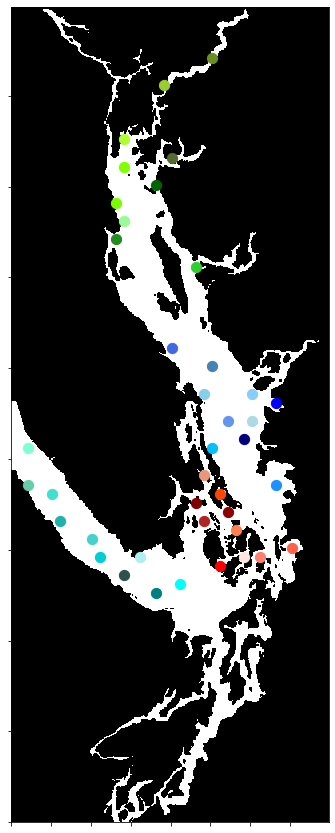

In [6]:


fig = plt.figure(figsize=(10,15))

plt.rcParams['image.cmap'] = 'gist_gray'

markersize = 105


ax = fig.add_subplot(1,1,1)
viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)

ax.set_ylim([0,898])
ax.set_xlim([0,398])

for i in range(0,len(JDF_list)):
    ti = JDF_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=JDF_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(NS_list)):
    ti = NS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=NS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(CS_list)):
    ti = CS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=CS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(HARO_list)):
    ti = HARO_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=HARO_col[i], label='in stnlist' ,marker='o')
    
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 
plt.show()


# VISUALISE ARAGONITE SATURATION HORIZON FOR THE ABOVE STATIONS

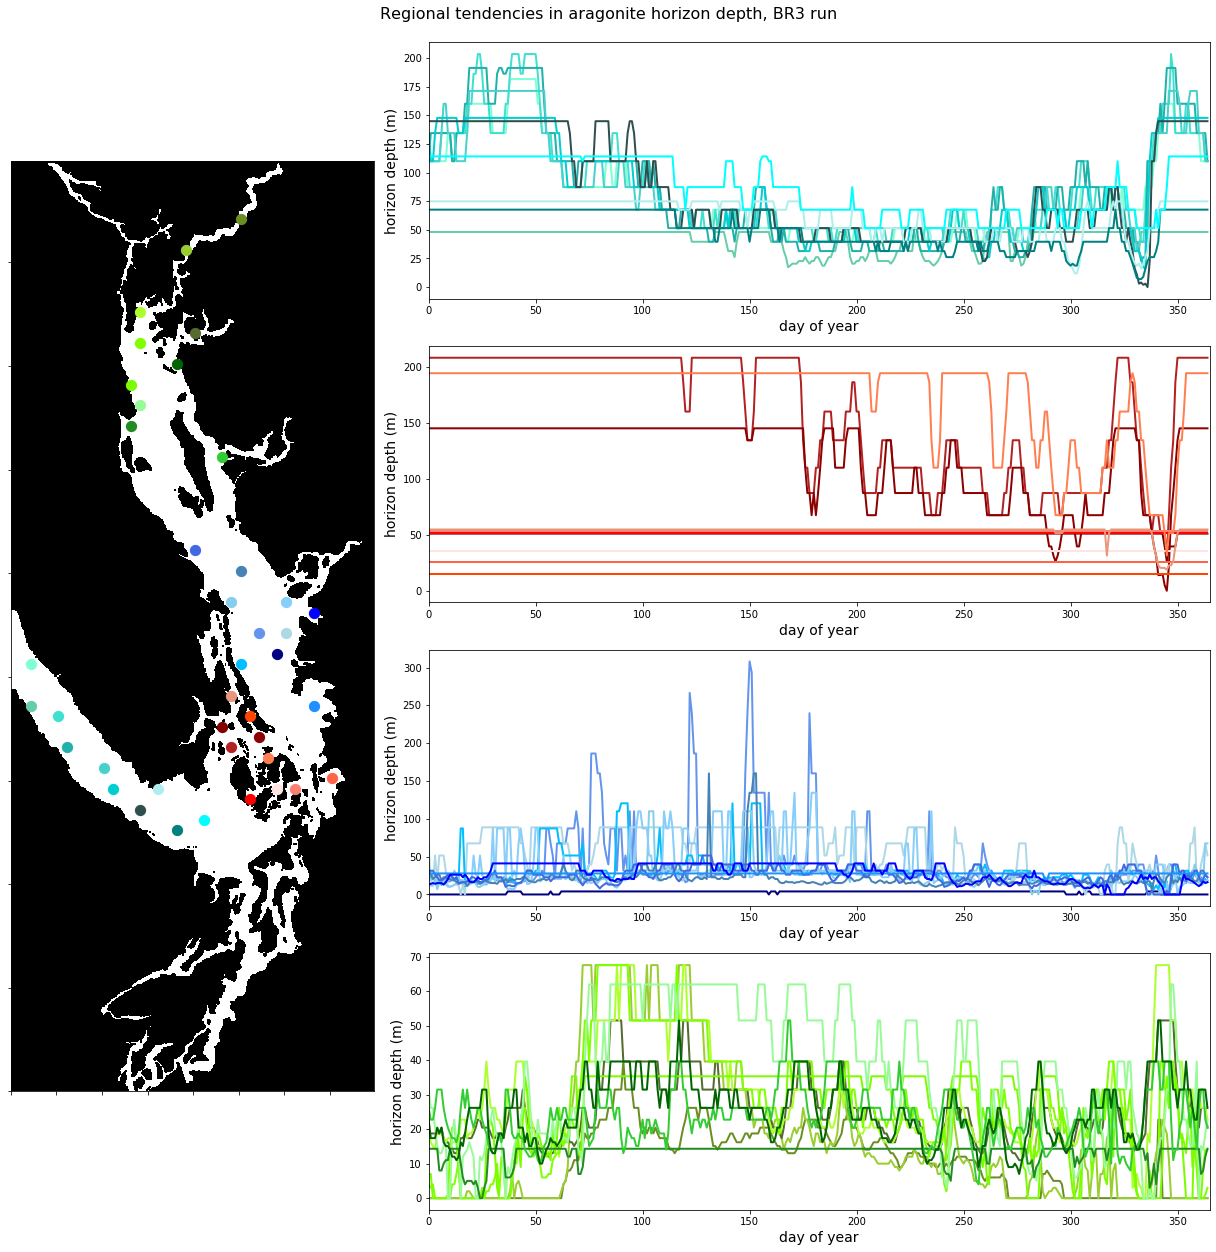

In [7]:
daze = np.arange(0,365,1)
fact = 1.7
fig = plt.figure(figsize=(10*fact, 10*fact))


ax = plt.subplot2grid((4,6), (0,0), colspan=2, rowspan=4)

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)

ax.set_ylim([0,898])
ax.set_xlim([0,398])

for i in range(0,len(JDF_list)):
    ti = JDF_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=JDF_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(NS_list)):
    ti = NS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=NS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(CS_list)):
    ti = CS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=CS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(HARO_list)):
    ti = HARO_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=HARO_col[i], label='in stnlist' ,marker='o')
    
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 

ax = plt.subplot2grid((4,6), (0,2), colspan=4, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    
ax = plt.subplot2grid((4,6), (1,2), colspan=4, rowspan=1)
for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    
ax = plt.subplot2grid((4,6), (2,2), colspan=4, rowspan=1)
for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    
ax = plt.subplot2grid((4,6), (3,2), colspan=4, rowspan=1)
for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    
fig.suptitle('Regional tendencies in aragonite horizon depth, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

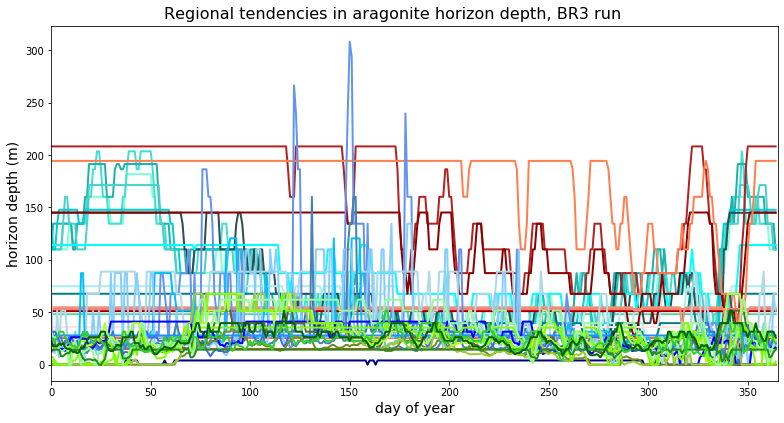

In [14]:
daze = np.arange(0,365,1)
fact = 1.1
fig = plt.figure(figsize=(10*fact, 5.2*fact))

ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_depth_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_hor'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    
fig.suptitle('Regional tendencies in aragonite horizon depth, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

# VISUALISE ARAGONITE AT SURFACE FOR THE ABOVE STATIONS

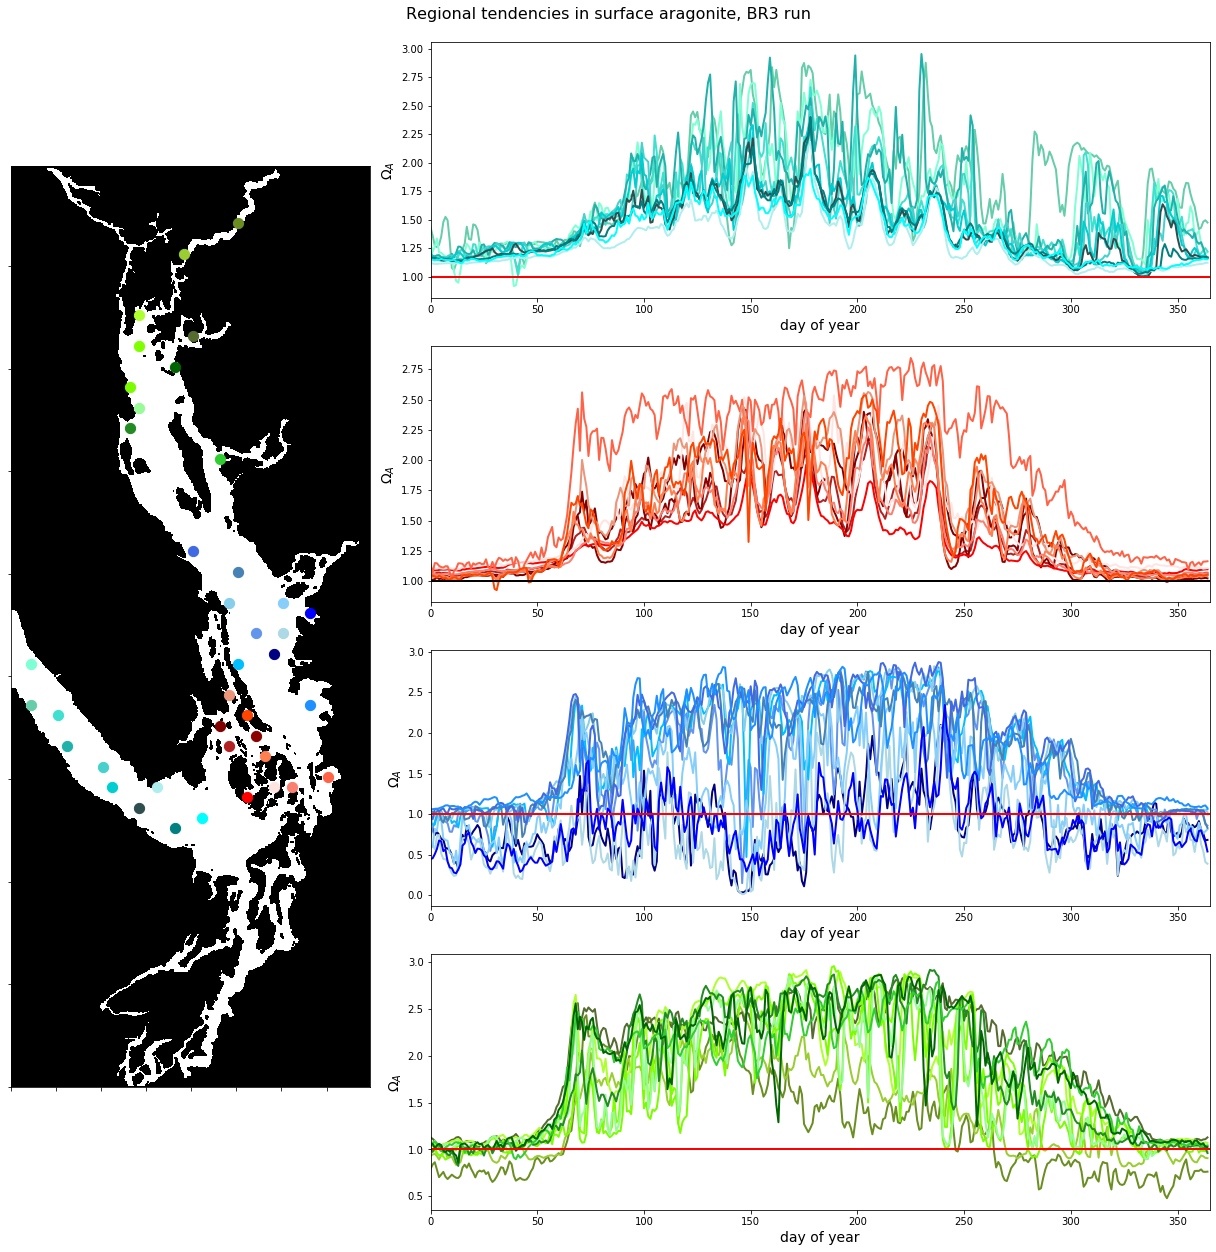

In [9]:
daze = np.arange(0,365,1)
fact = 1.7
fig = plt.figure(figsize=(10*fact, 10*fact))


ax = plt.subplot2grid((4,6), (0,0), colspan=2, rowspan=4)

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)

ax.set_ylim([0,898])
ax.set_xlim([0,398])

for i in range(0,len(JDF_list)):
    ti = JDF_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=JDF_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(NS_list)):
    ti = NS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=NS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(CS_list)):
    ti = CS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=CS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(HARO_list)):
    ti = HARO_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=HARO_col[i], label='in stnlist' ,marker='o')
    
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 

ax = plt.subplot2grid((4,6), (0,2), colspan=4, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'r', linewidth = 2)
    
ax = plt.subplot2grid((4,6), (1,2), colspan=4, rowspan=1)
for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'k', linewidth = 2)
    
ax = plt.subplot2grid((4,6), (2,2), colspan=4, rowspan=1)
for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'r', linewidth = 2)
    
ax = plt.subplot2grid((4,6), (3,2), colspan=4, rowspan=1)
for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'r', linewidth = 2)
    
    
fig.suptitle('Regional tendencies in surface aragonite, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

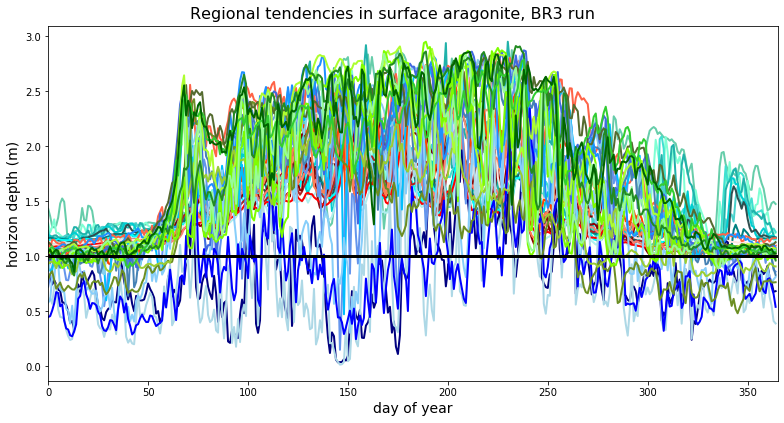

In [18]:
daze = np.arange(0,365,1)
fact = 1.1
fig = plt.figure(figsize=(10*fact, 5.2*fact))

ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_0m'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

ax.axhline(y=1,color = 'k', linewidth = 3)
fig.suptitle('Regional tendencies in surface aragonite, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

# VISUALISE ARAGONITE AT 10M FOR THE ABOVE STATIONS

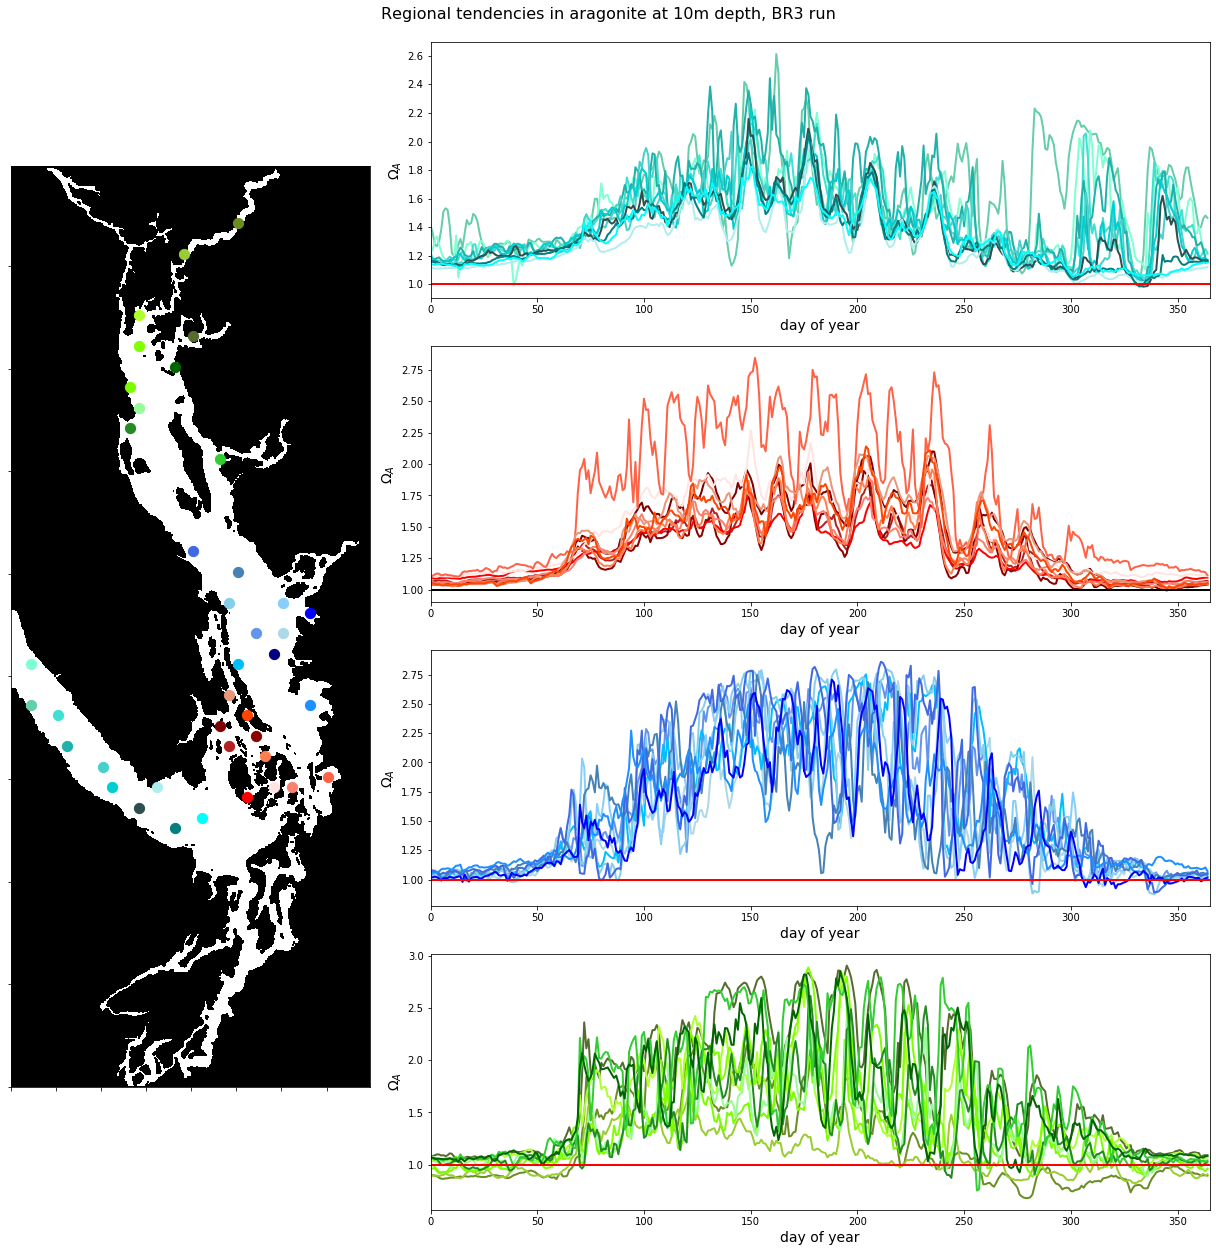

In [10]:
daze = np.arange(0,365,1)
fact = 1.7
fig = plt.figure(figsize=(10*fact, 10*fact))


ax = plt.subplot2grid((4,6), (0,0), colspan=2, rowspan=4)

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)

ax.set_ylim([0,898])
ax.set_xlim([0,398])

for i in range(0,len(JDF_list)):
    ti = JDF_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=JDF_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(NS_list)):
    ti = NS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=NS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(CS_list)):
    ti = CS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=CS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(HARO_list)):
    ti = HARO_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=HARO_col[i], label='in stnlist' ,marker='o')
    
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 

ax = plt.subplot2grid((4,6), (0,2), colspan=4, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_10m_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_10m'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'r', linewidth = 2)
    
ax = plt.subplot2grid((4,6), (1,2), colspan=4, rowspan=1)
for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_10m_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_10m'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'k', linewidth = 2)
    
ax = plt.subplot2grid((4,6), (2,2), colspan=4, rowspan=1)
for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_10m_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_10m'][:]
    tnc2[tnc2>1e19] = np.nan
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'r', linewidth = 2)
    
ax = plt.subplot2grid((4,6), (3,2), colspan=4, rowspan=1)
for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}asat_10m_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['arag_10m'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    ax.set_ylabel('$\Omega_{A}$', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)
    ax.axhline(y=1,color = 'r', linewidth = 2)
    
    
fig.suptitle('Regional tendencies in aragonite at 10m depth, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

## surface pH

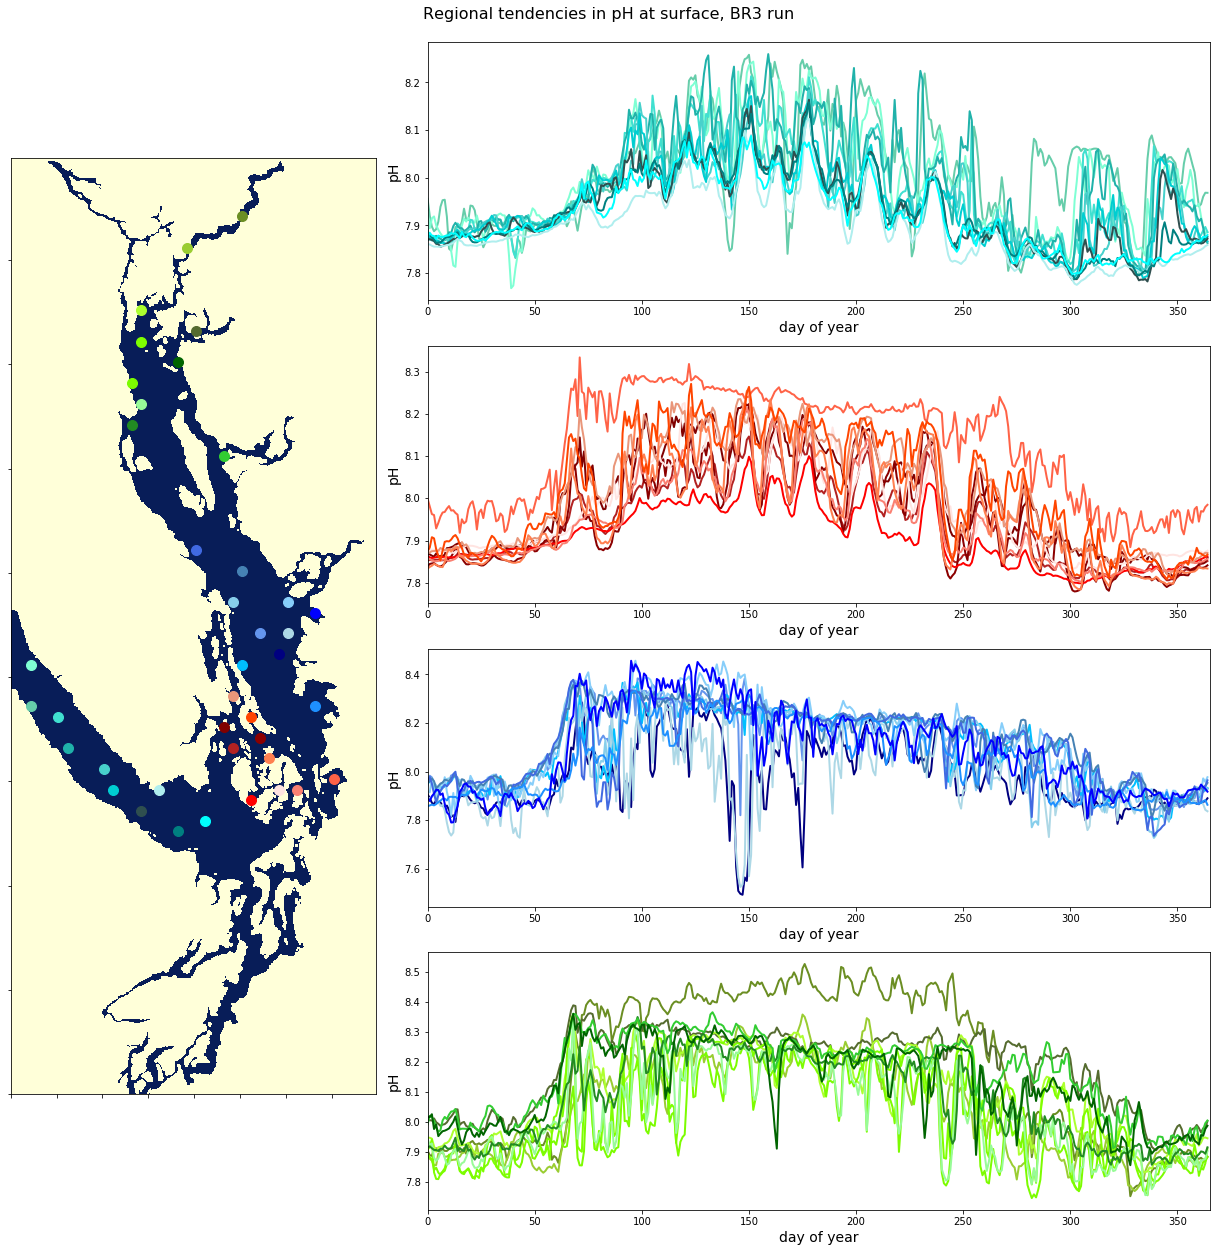

In [21]:
daze = np.arange(0,365,1)
fact = 1.7
fig = plt.figure(figsize=(10*fact, 10*fact))

markersize = 100
ax = plt.subplot2grid((4,6), (0,0), colspan=2, rowspan=4)

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)

ax.set_ylim([0,898])
ax.set_xlim([0,398])

for i in range(0,len(JDF_list)):
    ti = JDF_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=JDF_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(NS_list)):
    ti = NS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=NS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(CS_list)):
    ti = CS_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=CS_col[i], label='in stnlist' ,marker='o')

for i in range(0,len(HARO_list)):
    ti = HARO_list[i]
    ax.scatter(d_stn_x[ti],d_stn_y[ti],s=markersize,c=HARO_col[i], label='in stnlist' ,marker='o')
    
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 

ax = plt.subplot2grid((4,6), (0,2), colspan=4, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    ax.set_ylabel('pH', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

    
ax = plt.subplot2grid((4,6), (1,2), colspan=4, rowspan=1)
for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    ax.set_ylabel('pH', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

    
ax = plt.subplot2grid((4,6), (2,2), colspan=4, rowspan=1)
for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    tnc2[tnc2>1e19] = np.nan
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    ax.set_ylabel('pH', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

    
ax = plt.subplot2grid((4,6), (3,2), colspan=4, rowspan=1)
for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    ax.set_ylabel('pH', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

    
    
fig.suptitle('Regional tendencies in pH at surface, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

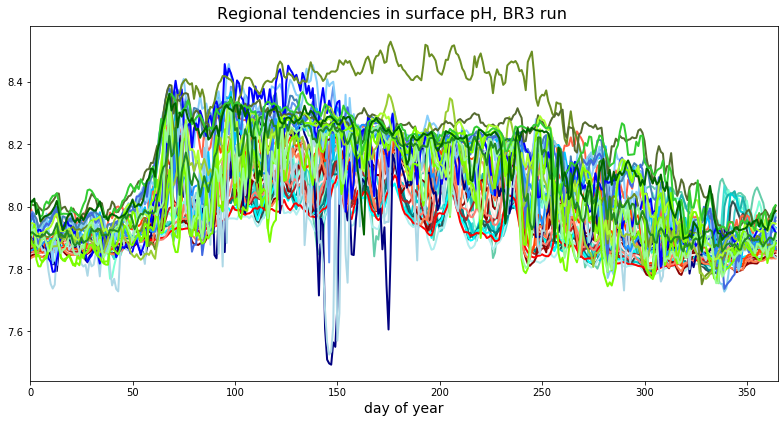

In [23]:
daze = np.arange(0,365,1)
fact = 1.1
fig = plt.figure(figsize=(10*fact, 5.2*fact))

ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
for i in range(0,len(JDF_list)):
    tstn = JDF_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = JDF_col[i],linewidth = 2)
    #ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(HARO_list)):
    tstn = HARO_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = HARO_col[i],linewidth = 2)
    #ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(CS_list)):
    tstn = CS_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = CS_col[i],linewidth = 2)
    #ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

for i in range(0,len(NS_list)):
    tstn = NS_list[i]
    ncnam = f'./ncs/BR3_{tstn}pH_surf_sp10.nc'
    tnc = nc.Dataset(ncnam)
    tnc2 = tnc['pH_0m'][:]
    ax.plot(daze,tnc2, c = NS_col[i],linewidth = 2)
    #ax.set_ylabel('horizon depth (m)', fontsize = 14)
    ax.set_xlabel('day of year', fontsize = 14)
    ax.set_xlim(0,365)

#ax.axhline(y=1,color = 'k', linewidth = 3)
fig.suptitle('Regional tendencies in surface pH, BR3 run',fontsize = 16, y = 1.02)
plt.tight_layout()

## manually look at stations, if necessary

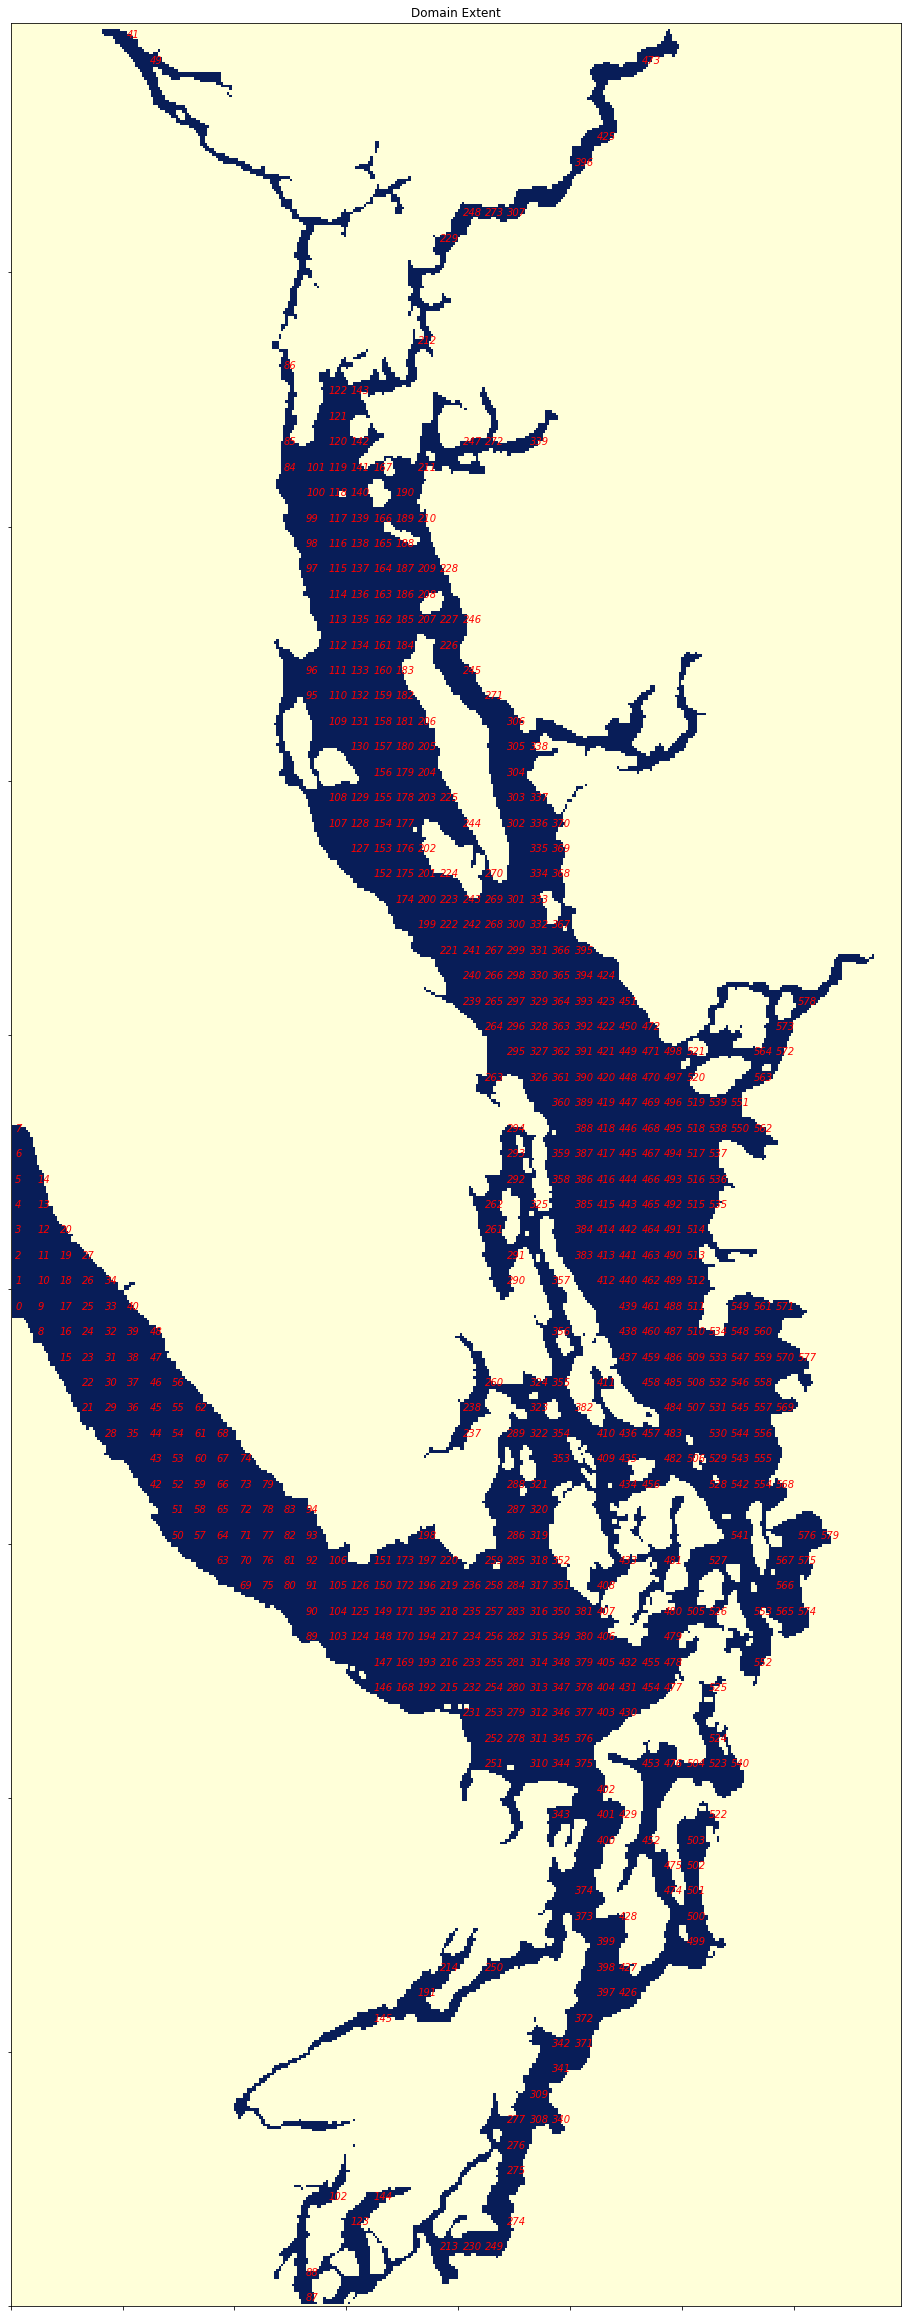

In [11]:
fact = 2.8

fig = plt.figure(figsize=(10*fact,15*fact))

plt.rcParams['image.cmap'] = 'YlGnBu'

no_clusters = 1
cl = np.zeros(580)
cl[:] = 1
colors = ['red']
markersize = 20


ax = fig.add_subplot(1,1,1)
viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)
out=ax.set(title='Domain Extent')

ax.set_ylim([0,898])
ax.set_xlim([0,398])


for i in range(0,580):
    ax.text(d_stn_x[i],d_stn_y[i],str(i),fontsize = 10, fontstyle = 'oblique', c = 'r')
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 

plt.show()


### list colours

In [12]:
import matplotlib.pyplot as plt 

from matplotlib import colors as mcolors 
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS) 
# Sort colors by hue, saturation, value and name. 
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name) 

for name, color in colors.items()) 

sorted_names = [name for hsv, name in by_hsv] 

n = len(sorted_names) 

print(sorted_names)

['black', 'k', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro', 'whitesmoke', 'w', 'white', 'snow', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'r', 'red', 'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki', 'ivory', 'beige', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'y', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'g', 'green', 'lime', 'seagreen